In [52]:
%matplotlib inline
import glob
from sklearn.naive_bayes import MultinomialNB
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from nltk import sent_tokenize
from nltk import pos_tag
from nltk import map_tag
from sklearn.metrics import classification_report
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
stop_words = set(stopwords.words('english'))

In [53]:
allFiles = glob.glob("C:\*.txt")#get the paper names,matching text files

In [54]:
print(allFiles)

['C:\\icse_id.txt', 'C:\\vldb_id.txt']


In [55]:
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,delimiter='\t')
    df.columns = ['id','title','title_small','year','date','unnamed','conference','conference_short','reference1','reference2','reference3']
    list_.append(df)
frame = pd.concat(list_)

In [56]:
print((frame))

            id                                              title  \
0     766984B4          Co-Operative Method Development revisited   
1     7F5DB806             An integrated bug processing framework   
2     78F1E9FF  Guest Editorial: Introduction to the Special S...   
3     7D6EB553  Optimizing symbolic model checking for statech...   
4     7FBCB0CC    Supporting search for reusable software objects   
5     790C5919  Identification of dynamic comprehension proces...   
6     7FEC4901  Completeness and consistency in hierarchical s...   
7     76B250FB  Guest editors' introduction: 1999 internationa...   
8     777166C0  Effectiveness Evaluation of Command and Contro...   
9     7B1A023C  Cloudlet-based cyber-foraging for mobile syste...   
10    7B583E24         An operating system development: Windows 3   
11    7811B21C  Representing Unique Stakeholder Perspectives i...   
12    7E90C370  Specification patterns from research to indust...   
13    8553A067  Automated Energy O

In [57]:
tfidf__max_df: (0.25, 0.50, 0.75)#removing words that appear too frequently in documents
tfidf__ngram_range: ((1, 1), (1, 2), (1, 3))#ngram_range parameter selects how large are the sequences of words to be considered

In [58]:
#split the d
data_x = frame[['title']].as_matrix()
print(data_x)
data_y = frame[['conference_short']].as_matrix()
print(data_y)

[['Co-Operative Method Development revisited']
 ['An integrated bug processing framework']
 ['Guest Editorial: Introduction to the Special Section']
 ...
 ['ACM transactions on database systems: aim and scope']
 ['The entity-relationship model—toward a unified view of data']
 ['Data Integration Using Web Services']]
[['icse']
 ['icse']
 ['icse']
 ...
 ['vldb']
 ['vldb']
 ['vldb']]


C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
stratified_split = StratifiedShuffleSplit(n_splits=2, test_size=0.33)
for train_index, test_index in stratified_split.split(data_x, data_y):
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]
train_x = [x[0].strip() for x in x_train.tolist()]
test_x = [x[0].strip() for x in x_test.tolist()]
print(y_test)

[['icse']
 ['vldb']
 ['icse']
 ...
 ['icse']
 ['vldb']
 ['icse']]


In [60]:
pipeline_NB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters_NB = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf_estimator_alpha': (1e-2, 1e-3)
}

In [61]:
grid_search_tune = GridSearchCV(
    pipeline_NB
    , parameters_NB, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, y_train)


print("Parameters:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)

print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions, labels=["vldb", "icse"])

Fitting 2 folds for each of 18 candidates, totalling 36 fits


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000263054A2F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\aayushi srivastava\Anaconda3\lib\site-p...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\a...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000263054A2F60, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\aayushi srivastava\Anaconda3\lib\site-p...ges\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\a...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(512, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(512, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (512, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=512, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 28, 2, 38, 49, 932857, tzinfo=tzutc()), 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'session': 'd1417ed41c9c43b6af31277b610f6eb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'd1417ed41c9c43b6af31277b610f6eb2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 28, 2, 38, 49, 932857, tzinfo=tzutc()), 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'session': 'd1417ed41c9c43b6af31277b610f6eb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'd1417ed41c9c43b6af31277b610f6eb2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 11, 28, 2, 38, 49, 932857, tzinfo=tzutc()), 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'session': 'd1417ed41c9c43b6af31277b610f6eb2', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '99c90725bb674a8b811a39cebaebfc3a', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='grid_search_tune = GridSearchCV(\n    pipeline_NB...rix(y_test, predictions, labels=["vldb", "icse"])', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-61-9bd2d6d04d6a>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 2630e0cf160, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002630D774300, file "<ipython-input-61-9bd2d6d04d6a>", line 4>
        result = <ExecutionResult object at 2630e0cf160, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002630D774300, file "<ipython-input-61-9bd2d6d04d6a>", line 4>, result=<ExecutionResult object at 2630e0cf160, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002630D774300, file "<ipython-input-61-9bd2d6d04d6a>", line 4>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...trix\nstop_words = set(stopwords.words('english'))", r'allFiles = glob.glob("C:\*.txt")', 'print(allFiles)', "frame = pd.DataFrame()\nlist_ = []\nfor file_ in a...3']\n    list_.append(df)\nframe = pd.concat(list_)", 'print((frame))', 'tfidf__max_df: (0.25, 0.50, 0.75)\ntfidf__ngram_range: ((1, 1), (1, 2), (1, 3))', "data_x = frame[['title']].as_matrix()\nprint(data...e[['conference_short']].as_matrix()\nprint(data_y)", 'stratified_split = StratifiedShuffleSplit(n_spli...].strip() for x in x_test.tolist()]\nprint(y_test)', "pipeline_NB = Pipeline([\n    ('tfidf', TfidfVect...1, 3)],\n    'clf_estimator_alpha': (1e-2, 1e-3)\n}", 'grid_search_tune = GridSearchCV(\n    pipeline_NB...print(classification_report(y_test, predictions))', "#KNN\npipeline_KNN = Pipeline([\n    ('tfidf', Tfi... 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]\n}", 'confusion_matrix(y_test, predictions, labels=["vldb", "icse"])', "#KNN\npipeline_KNN = Pipeline([\n    ('tfidf', Tfi...1, 3)],\n    'clf_estimator_alpha': (1e-2, 1e-3)\n}", 'grid_search_tune = GridSearchCV(\n    pipeline_KN...print(classification_report(y_test, predictions))', "pipeline_tf = Pipeline([('tfidf', TfidfVectorize...'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],\n}", "#Naive's Bayes\npipeline_NB = Pipeline([\n    ('tf... 3)],\n    'clf__estimator__alpha': (1e-2, 1e-3)\n}", '#SVM\npipeline_SVM = Pipeline(\n    [\n    (\'tfidf\'...__estimator__class_weight": [\'balanced\', None],\n}', '#Logistic Regression\npipeline_logistic = Pipelin...__estimator__class_weight": [\'balanced\', None],\n}', '#Naive\'s Bayes\npipeline_NB = Pipeline([\n    (\'tf...rix(y_test, predictions, labels=["vldb", "icse"])', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'ListedColormap': <class 'matplotlib.colors.ListedColormap'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...trix\nstop_words = set(stopwords.words('english'))", r'allFiles = glob.glob("C:\*.txt")', 'print(allFiles)', "frame = pd.DataFrame()\nlist_ = []\nfor file_ in a...3']\n    list_.append(df)\nframe = pd.concat(list_)", 'print((frame))', 'tfidf__max_df: (0.25, 0.50, 0.75)\ntfidf__ngram_range: ((1, 1), (1, 2), (1, 3))', "data_x = frame[['title']].as_matrix()\nprint(data...e[['conference_short']].as_matrix()\nprint(data_y)", 'stratified_split = StratifiedShuffleSplit(n_spli...].strip() for x in x_test.tolist()]\nprint(y_test)', "pipeline_NB = Pipeline([\n    ('tfidf', TfidfVect...1, 3)],\n    'clf_estimator_alpha': (1e-2, 1e-3)\n}", 'grid_search_tune = GridSearchCV(\n    pipeline_NB...print(classification_report(y_test, predictions))', "#KNN\npipeline_KNN = Pipeline([\n    ('tfidf', Tfi... 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]\n}", 'confusion_matrix(y_test, predictions, labels=["vldb", "icse"])', "#KNN\npipeline_KNN = Pipeline([\n    ('tfidf', Tfi...1, 3)],\n    'clf_estimator_alpha': (1e-2, 1e-3)\n}", 'grid_search_tune = GridSearchCV(\n    pipeline_KN...print(classification_report(y_test, predictions))', "pipeline_tf = Pipeline([('tfidf', TfidfVectorize...'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],\n}", "#Naive's Bayes\npipeline_NB = Pipeline([\n    ('tf... 3)],\n    'clf__estimator__alpha': (1e-2, 1e-3)\n}", '#SVM\npipeline_SVM = Pipeline(\n    [\n    (\'tfidf\'...__estimator__class_weight": [\'balanced\', None],\n}', '#Logistic Regression\npipeline_logistic = Pipelin...__estimator__class_weight": [\'balanced\', None],\n}', '#Naive\'s Bayes\npipeline_NB = Pipeline([\n    (\'tf...rix(y_test, predictions, labels=["vldb", "icse"])', ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LinearSVC': <class 'sklearn.svm.classes.LinearSVC'>, 'ListedColormap': <class 'matplotlib.colors.ListedColormap'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'OneVsRestClassifier': <class 'sklearn.multiclass.OneVsRestClassifier'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\aayushi srivastava\<ipython-input-61-9bd2d6d04d6a> in <module>()
      1 grid_search_tune = GridSearchCV(
      2     pipeline_NB
      3     , parameters_NB, cv=2, n_jobs=2, verbose=3)
----> 4 grid_search_tune.fit(train_x, y_train)
      5 
      6 
      7 print("Parameters:")
      8 print(grid_search_tune.best_estimator_.steps)
      9 
     10 # measuring performance on test set

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=2, error_score='raise',
       e...ain_score='warn',
       scoring=None, verbose=3), X=['Failure mechanism observed through static latchup simulation', 'A Processing Interface for Multiple External Schema Access to a Data Base Management System', 'Parallel Query Scheduling and Optimization with Time- and Space-Shared Resources', 'An adaptive threshold segmentation method based on BP neural network for paper defect detection', 'Evaluation of Main Memory Join Algorithms for Joins with Set Comparison Join Predicates', 'Departures from optimality: understanding human ...rmation foraging in assisted requirements tracing', 'An adaptive distributed query processing grid service', 'A decision support system for classification and recognition of earthquakes and explosions', 'Software product lines (workshop session): economics, architectures, and applications', 'Exploring the internal state of user interfaces ...uter vision techniques with grammatical inference', 'Detection of Potential Interference Among Aspects Using Graphical Notation', 'Daily build and feature development in large distributed projects', 'A light-weight publisher-subscriber middleware f...nfiguration in networks of embedded smart cameras', 'Making software knowledgeable', 'Project estimation using Screenflow Engineering', 'Spatio-Temporal Retrieval with RasDaMan', 'An incremental flow- and context-sensitive pointer aliasing analysis', 'Decentralised process modelling in a multi-perspective development environment', 'Design of a micromechanical system utilizing hydrogel force for controlling a microvalve', 'Spatial keyword query processing: an experimental evaluation', ...], y=array([['icse'],
       ['vldb'],
       ['vldb'...
       ['icse'],
       ['icse']], dtype=object), groups=None, **fit_params={})
    635                                   return_train_score=self.return_train_score,
    636                                   return_n_test_samples=True,
    637                                   return_times=True, return_parameters=False,
    638                                   error_score=self.error_score)
    639           for parameters, (train, test) in product(candidate_params,
--> 640                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=2, random_state=None, shuffle=False)>
        X = ['Failure mechanism observed through static latchup simulation', 'A Processing Interface for Multiple External Schema Access to a Data Base Management System', 'Parallel Query Scheduling and Optimization with Time- and Space-Shared Resources', 'An adaptive threshold segmentation method based on BP neural network for paper defect detection', 'Evaluation of Main Memory Join Algorithms for Joins with Set Comparison Join Predicates', 'Departures from optimality: understanding human ...rmation foraging in assisted requirements tracing', 'An adaptive distributed query processing grid service', 'A decision support system for classification and recognition of earthquakes and explosions', 'Software product lines (workshop session): economics, architectures, and applications', 'Exploring the internal state of user interfaces ...uter vision techniques with grammatical inference', 'Detection of Potential Interference Among Aspects Using Graphical Notation', 'Daily build and feature development in large distributed projects', 'A light-weight publisher-subscriber middleware f...nfiguration in networks of embedded smart cameras', 'Making software knowledgeable', 'Project estimation using Screenflow Engineering', 'Spatio-Temporal Retrieval with RasDaMan', 'An incremental flow- and context-sensitive pointer aliasing analysis', 'Decentralised process modelling in a multi-perspective development environment', 'Design of a micromechanical system utilizing hydrogel force for controlling a microvalve', 'Spatial keyword query processing: an experimental evaluation', ...]
        y = array([['icse'],
       ['vldb'],
       ['vldb'...
       ['icse'],
       ['icse']], dtype=object)
        groups = None
    641 
    642         # if one choose to see train score, "out" will contain train score info
    643         if self.return_train_score:
    644             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Nov 27 21:38:50 2018
PID: 16784   Python 3.7.0: C:\Users\aayushi srivastava\Anaconda3\python.exe
...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), ['Failure mechanism observed through static latchup simulation', 'A Processing Interface for Multiple External Schema Access to a Data Base Management System', 'Parallel Query Scheduling and Optimization with Time- and Space-Shared Resources', 'An adaptive threshold segmentation method based on BP neural network for paper defect detection', 'Evaluation of Main Memory Join Algorithms for Joins with Set Comparison Join Predicates', 'Departures from optimality: understanding human ...rmation foraging in assisted requirements tracing', 'An adaptive distributed query processing grid service', 'A decision support system for classification and recognition of earthquakes and explosions', 'Software product lines (workshop session): economics, architectures, and applications', 'Exploring the internal state of user interfaces ...uter vision techniques with grammatical inference', 'Detection of Potential Interference Among Aspects Using Graphical Notation', 'Daily build and feature development in large distributed projects', 'A light-weight publisher-subscriber middleware f...nfiguration in networks of embedded smart cameras', 'Making software knowledgeable', 'Project estimation using Screenflow Engineering', 'Spatio-Temporal Retrieval with RasDaMan', 'An incremental flow- and context-sensitive pointer aliasing analysis', 'Decentralised process modelling in a multi-perspective development environment', 'Design of a micromechanical system utilizing hydrogel force for controlling a microvalve', 'Spatial keyword query processing: an experimental evaluation', ...], array([['icse'],
       ['vldb'],
       ['vldb'...
       ['icse'],
       ['icse']], dtype=object), {'score': <function _passthrough_scorer>}, array([4818, 4819, 4820, ..., 9650, 9651, 9652]), array([   0,    1,    2, ..., 4842, 4843, 4847]), 3, {'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), ['Failure mechanism observed through static latchup simulation', 'A Processing Interface for Multiple External Schema Access to a Data Base Management System', 'Parallel Query Scheduling and Optimization with Time- and Space-Shared Resources', 'An adaptive threshold segmentation method based on BP neural network for paper defect detection', 'Evaluation of Main Memory Join Algorithms for Joins with Set Comparison Join Predicates', 'Departures from optimality: understanding human ...rmation foraging in assisted requirements tracing', 'An adaptive distributed query processing grid service', 'A decision support system for classification and recognition of earthquakes and explosions', 'Software product lines (workshop session): economics, architectures, and applications', 'Exploring the internal state of user interfaces ...uter vision techniques with grammatical inference', 'Detection of Potential Interference Among Aspects Using Graphical Notation', 'Daily build and feature development in large distributed projects', 'A light-weight publisher-subscriber middleware f...nfiguration in networks of embedded smart cameras', 'Making software knowledgeable', 'Project estimation using Screenflow Engineering', 'Spatio-Temporal Retrieval with RasDaMan', 'An incremental flow- and context-sensitive pointer aliasing analysis', 'Decentralised process modelling in a multi-perspective development environment', 'Design of a micromechanical system utilizing hydrogel force for controlling a microvalve', 'Spatial keyword query processing: an experimental evaluation', ...], array([['icse'],
       ['vldb'],
       ['vldb'...
       ['icse'],
       ['icse']], dtype=object), {'score': <function _passthrough_scorer>}, array([4818, 4819, 4820, ..., 9650, 9651, 9652]), array([   0,    1,    2, ..., 4842, 4843, 4847]), 3, {'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), X=['Failure mechanism observed through static latchup simulation', 'A Processing Interface for Multiple External Schema Access to a Data Base Management System', 'Parallel Query Scheduling and Optimization with Time- and Space-Shared Resources', 'An adaptive threshold segmentation method based on BP neural network for paper defect detection', 'Evaluation of Main Memory Join Algorithms for Joins with Set Comparison Join Predicates', 'Departures from optimality: understanding human ...rmation foraging in assisted requirements tracing', 'An adaptive distributed query processing grid service', 'A decision support system for classification and recognition of earthquakes and explosions', 'Software product lines (workshop session): economics, architectures, and applications', 'Exploring the internal state of user interfaces ...uter vision techniques with grammatical inference', 'Detection of Potential Interference Among Aspects Using Graphical Notation', 'Daily build and feature development in large distributed projects', 'A light-weight publisher-subscriber middleware f...nfiguration in networks of embedded smart cameras', 'Making software knowledgeable', 'Project estimation using Screenflow Engineering', 'Spatio-Temporal Retrieval with RasDaMan', 'An incremental flow- and context-sensitive pointer aliasing analysis', 'Decentralised process modelling in a multi-perspective development environment', 'Design of a micromechanical system utilizing hydrogel force for controlling a microvalve', 'Spatial keyword query processing: an experimental evaluation', ...], y=array([['icse'],
       ['vldb'],
       ['vldb'...
       ['icse'],
       ['icse']], dtype=object), scorer={'score': <function _passthrough_scorer>}, train=array([4818, 4819, 4820, ..., 9650, 9651, 9652]), test=array([   0,    1,    2, ..., 4842, 4843, 4847]), verbose=3, parameters={'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...or=None, fit_prior=True),
          n_jobs=1))])>
        parameters = {'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), **kwargs={'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...or=None, fit_prior=True),
          n_jobs=1))])>
        kwargs = {'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\utils\metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), attr='steps', **params={'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...or=None, fit_prior=True),
          n_jobs=1))])>
        params = {'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\sklearn\base.py in set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))]), **params={'clf_estimator_alpha': 0.01, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'clf_estimator_alpha'
        self = Pipeline(memory=None,
     steps=[('tfidf', Tfid...ior=None, fit_prior=True),
          n_jobs=1))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter clf_estimator_alpha for estimator Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...assifier(estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
          n_jobs=1))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

In [62]:
pipeline_KNN = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(KNeighborsClassifier(
        n_neighbors=5))),
])
parameters_KNN = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

In [63]:
grid_search_tune = GridSearchCV(
    pipeline_KNN
    , parameters_KNN, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(train_x, y_train)


print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

# measuring performance on test set
print("Applying best classifier on test data:")
best_clf = grid_search_tune.best_estimator_
predictions = best_clf.predict(test_x)
confusion_matrix(y_test, predictions, labels=["vldb", "icse"])
print(classification_report(y_test, predictions))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:   18.6s finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words={'than', 'just', 'yourselves', "haven't", 'there', 'm', 'have', 'or', 'they', 'yourself', 'does', "wasn't", "mightn't", 'be', 'but', 'no', 'here', 'until', 'against', 'was', 'by', 'when', "it's", 'wasn', 'your', 'are', 'mightn', 'hers', 'such', 'only', 'too', 'he', "shouldn't", 'being', '... 'its', 'other', 'up', 'our', 'in', 'why', "weren't", 'wouldn', 'ain', 'am', 'most', 'so', 'couldn'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           me

array([[1156,  271],
       [ 221, 3107]], dtype=int64)

In [64]:
pipeline_tf = Pipeline([('tfidf', TfidfVectorizer(stop_words=stop_words))])
parameters_logistic = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
}

[[-0.02997328 -0.01464728]
 [-0.02899673 -0.01614608]
 [ 0.12200902 -0.01192484]
 ...
 [-0.04155103 -0.01116812]
 [ 0.14905788 -0.01625076]
 [-0.04324405 -0.01010824]]


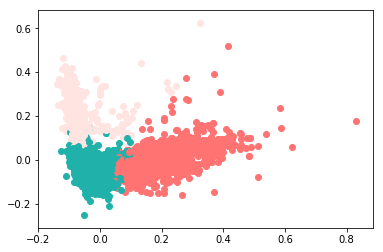

In [ ]:

#K means
num_clusters = 3
num_seeds = 10
max_iterations = 300
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1'}
pca_num_components = 2
tsne_num_components = 2

# texts_list = some array of strings for which TF-IDF is being computed
# calculate tf-idf of texts
# create k-means model with custom config
x_train_corrected = [" ".join(x) for x in x_train]

vectorizer=TfidfVectorizer(min_df=1,max_df=0.5,stop_words='english', decode_error='ignore')
tf_idf_matrix = vectorizer.fit_transform(x_train_corrected)
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations,
    precompute_distances="auto",
    n_jobs=-1
)



labels = clustering_model.fit_predict(tf_idf_matrix)
# print labels

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
print(reduced_data)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = reduced_data[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
plt.show()



# t-SNE plot
embeddings = TSNE(n_components=tsne_num_components)
Y = embeddings.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], cmap=plt.cm.Spectral)
plt.show()

In [42]:
#Naive's Bayes
pipeline_NB = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(MultinomialNB(
        fit_prior=True, class_prior=None))),
])
parameters_NB = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__estimator__alpha': (1e-2, 1e-3)
}


In [47]:
#SVM
pipeline_SVM = Pipeline(
    [
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(LinearSVC()))])
parameters_SVM = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}
confusion_matrix(y_test, predictions, labels=["vldb", "icse"])

array([[1156,  271],
       [ 221, 3107]], dtype=int64)

In [49]:
#Logistic Regression
pipeline_logistic = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('clf', OneVsRestClassifier(LogisticRegression(solver='sag')))])
parameters_logistic = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    "clf__estimator__C": [0.01, 0.1, 1],
    "clf__estimator__class_weight": ['balanced', None],
}
confusion_matrix(y_test, predictions, labels=["vldb", "icse"])

array([[1156,  271],
       [ 221, 3107]], dtype=int64)